
# Project: Investigate a Dataset (Movie Data Base!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#reading our data
data=pd.read_csv('tmdb-movies.csv')
data.info()

data.head(10)

     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

some columns can be dropped like:
- budget     (we use budget_adj as gives more accurate information based on inflation)               
- revenue    (we use revune_adj as gives more accurate information based on inflation)  
- id         (as its title is enough)
- imdb_id    (as its title is enough)
- home_page  (I think no need for it)
 
 some columns uses '|' to combine many values ...I will seperate each value in seperate row in the following columns :
 - genres 
 - director
 - cast
 - production_companies

In [3]:
#drop not needed columns
data.drop(labels=['budget','revenue','id','imdb_id','homepage'],inplace=True,axis=1)

#this part for counting maximum number of combined values for columns we want to split the values inside it

d_size=data.dropna(subset=['genres','director','cast','production_companies']) 


d_size.genres=d_size.genres.apply(lambda x :len(x.split('|')))
genres_size=int(d_size.genres.max())

d_size.cast=d_size.cast.apply(lambda x :len(x.split('|')))
cast_size=int(d_size.cast.max())

d_size.director=d_size.director.apply(lambda x :len(x.split('|')))
director_size=int(d_size.director.max())

d_size.production_companies=d_size.production_companies.apply(lambda x :len(x.split('|')))
production_companies_size=int(d_size.production_companies.max())

print((cast_size,genres_size,director_size,production_companies_size))



(5, 5, 36, 5)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [4]:
def split_value_in_column(d,col,max_size): 
    d_return=pd.DataFrame()
    d=d.copy()
    d.dropna(subset=[col],inplace=True) #we won't be able to split those values if we have null values  
    for i in range(0, max_size):
        dx=d.copy()
        dx[col]=dx[col].apply(lambda x :x.split('|')[i]  if len(x.split('|'))>i else '' )
        d_return=d_return.append(dx)
        d_return=d_return[d_return[col]!='']
    return d_return
#using sepreate data frame for each intrested Column to maintain as many data as possible as I dropped null rows in each operation 
d_genres=split_value_in_column(data,'genres',genres_size)
d_cast=split_value_in_column(data,'cast',cast_size)
d_director=split_value_in_column(data,'director',director_size)
d_companies=split_value_in_column(data,'production_companies',production_companies_size)


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

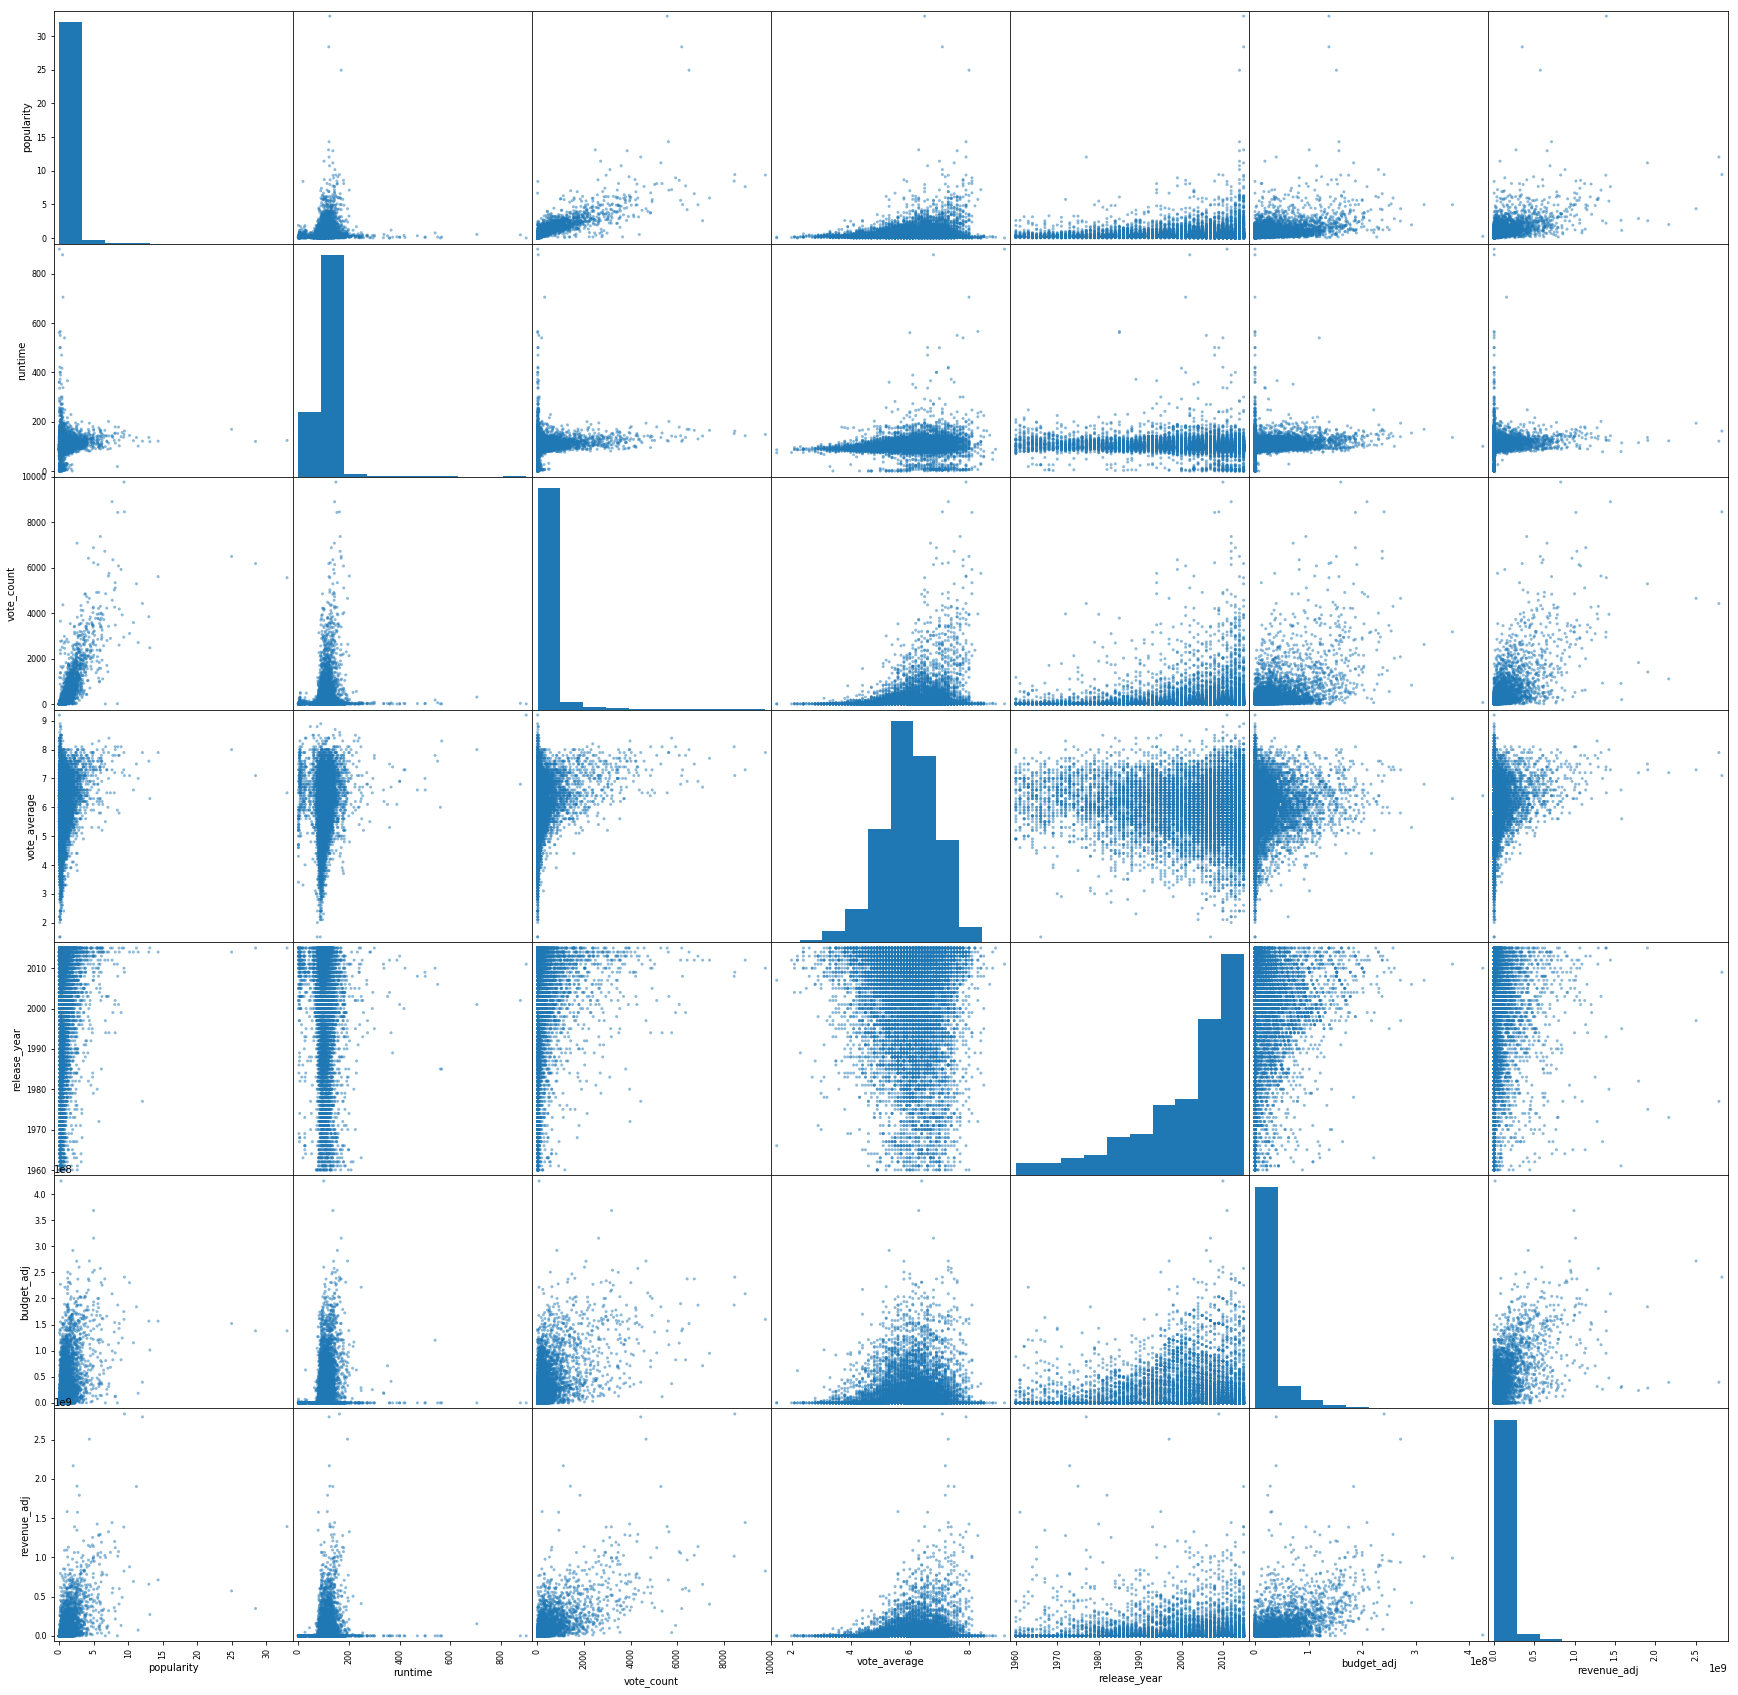

In [5]:
 pd.plotting.scatter_matrix(data,figsize=(30,30));


we see that most of data has no correlation but the following are correlated:
- profit and budget 
- profit and popularity 
- profit and vote_count
- vote_count and popularity 


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (generes sorted with runtime!)
which genre that has most running time ?
Answer: History , War ,western are the top 3

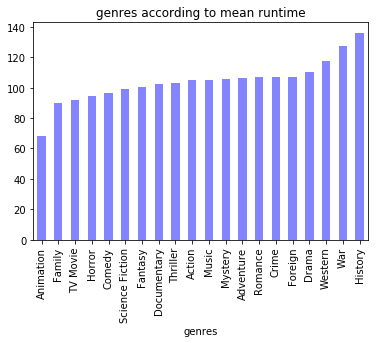

In [6]:
d_genres.groupby('genres').mean()['runtime'].sort_values().plot.bar(color=(.2,.2,1,0.6),title='genres according to mean runtime');

 

### Research Question 2 (most popular genre for every year!)


In [7]:
top_gen=pd.DataFrame()#for storing our results
for year in d_genres.release_year.unique():#pick every year and find the mean value of popularity in each genre
    top_gen=top_gen.append(d_genres.query('release_year == @year').groupby('genres',as_index=False).mean().sort_values(by='popularity')[['genres','release_year']].tail(1).copy())
top_gen.reset_index(drop=True)#just for making our data frame looking tidy

,genres,release_year
0,Adventure,2015.0
1,Adventure,2014.0
2,Action,1977.0
3,Adventure,2009.0
4,Adventure,2010.0
5,Adventure,1999.0
6,Fantasy,2001.0
7,Adventure,2008.0
8,Western,2011.0
9,Fantasy,2002.0


### Research Question 3 (what genres that producer would like to consider to get highest profit?)
the top three are :
- Adventure
- Fantasy
- Action

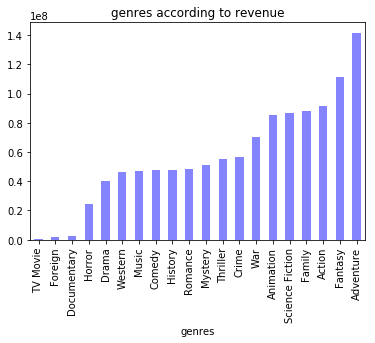

In [8]:
d_genres.groupby('genres').mean()['revenue_adj'].sort_values().plot.bar(color=(.2,.2,1,0.6),title='genres according to revenue')
 

### Research Question 4 (what genres that producer would like to consider to get highest profit?)
the top three are :
- Adventure
- Fantasy
- sci-fi

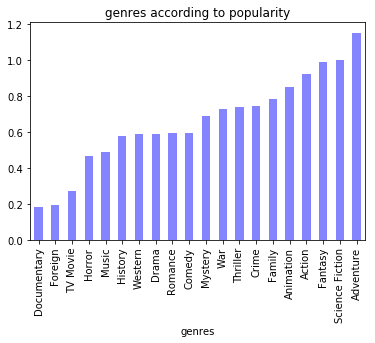

In [9]:
d_genres.groupby('genres').mean()['popularity'].sort_values().plot.bar(color=(.2,.2,1,0.6),title='genres according to popularity')


### Research Question 5 (what are top 10 highest profit movies?)
the top three are :
- Avatar
- Star Wars
- Titanic

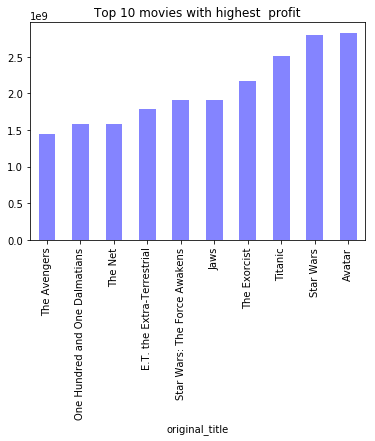

In [11]:

##using groupby() , max() and sorting with respect to profit  we can plot our results  
data.groupby('original_title')['revenue_adj'].max().sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='Top 10 movies with highest  profit')

### Research Question 6 (what are top 10  titles with longest time?)
the runtime appears very large which is strange ... when I searched for those titles with highest runtime they appeared to be **Tv shows** 
- the pacific https://www.themoviedb.org/tv/16997-the-pacific
- the Story of Film: An Odyssey   https://www.imdb.com/title/tt2044056/


that leads to two suggestions:

   - the data set should have colmun like **type** which describe the title is cenamtic movie or TV show
   - genres should be updated to include **Tv show** or  **Movie**
   
I think knowing the type of show will make more good results

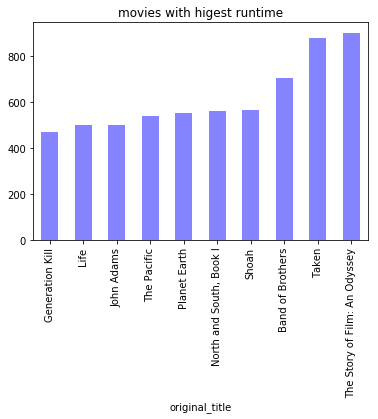

In [12]:
data.groupby('original_title').max()['runtime'].sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='movies with higest runtime');



### Research Question 7 (Directors that are most productive?)


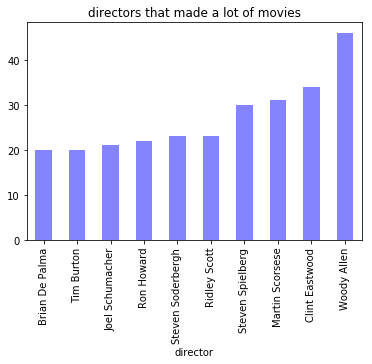

In [13]:
d_director.groupby('director').count()['original_title'].sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='directors that made a lot of movies')

### Research Question 7 (Top 10 directors that make movies with high profit?)


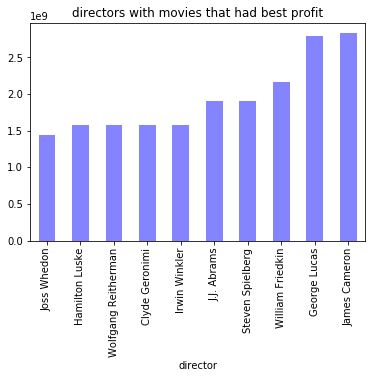

In [14]:
d_director.groupby('director')['revenue_adj'].max().sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='directors with movies that had best profit')

### Research Question 8 (Most hired Acotrs?)


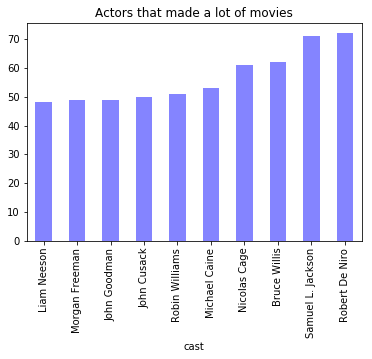

In [15]:
d_cast.groupby('cast').count()['original_title'].sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='Actors that made a lot of movies')

### Research Question 8 (Most productive Companies?)

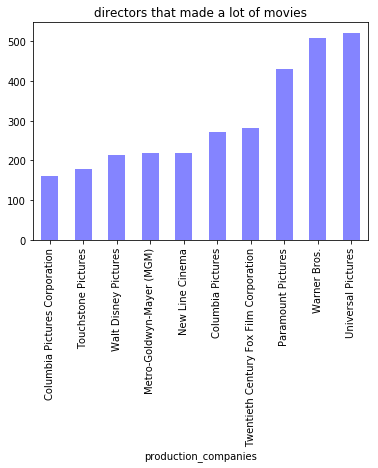

In [16]:
d_companies.groupby('production_companies').count()['original_title'].sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='Most productive Companies')

### Research Question 8 (Companies with highest profit?)

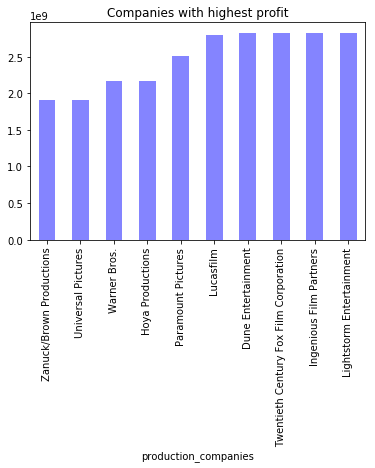

In [18]:
d_companies.groupby('production_companies')['revenue_adj'].max().sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='Companies with highest profit')

<a id='conclusions'></a>
## Conclusions

- the data set doesn't have clear evidence to know if a certain title is movie or tv show as in Q6 we may use condition like ```(runtime>150) ``` to tell that is Tv show (as most movies about 3 hours) but we should find better way or update or data set from **tmdb**
- most popular genre is Adventure
- most hired Actor is Robert De Niro
- most hired Actor is Robert De Niro
- most hired director is Robert woody alan
- the top higest profit movie is titanic
- genres with highest run time is history(I think becuase it has many TV shows)
- Tv show with long runtime is The Story of Film: An Odyssey
- we see that most of data has no correlation but the following are correlated:
    - profit and budget 
    - profit and popularity 
    - profit and vote_count
    - vote_count and popularity 